In [1]:
from preprocessing import *
from import_data import *
from plotting import *
data_dir = 'DataCollection/outputs/'
ssvep_dir1 = data_dir + 'SSVEP/sess5/'
ssvep_dir2 = 'DataCollection/outputs/Ollie_SSVEP/'
col_names = ['Time','Fp1', 'O1', 'O2','C3','C4','P3','P4','Pz']
ssvep_files = get_files(ssvep_dir1)
ssvep_ollie = get_files(ssvep_dir2)

In [2]:
ssvep_ollie

['DataCollection/outputs/Ollie_SSVEP/joelle_data_trial_000.txt',
 'DataCollection/outputs/Ollie_SSVEP/joelle_good_10.8Hz_000.xdf',
 'DataCollection/outputs/Ollie_SSVEP/joelle_good_10Hz_000.xdf',
 'DataCollection/outputs/Ollie_SSVEP/joelle_good_11.6Hz_000.xdf',
 'DataCollection/outputs/Ollie_SSVEP/joelle_good_12.4Hz_000.xdf',
 'DataCollection/outputs/Ollie_SSVEP/joelle_good_13.2Hz_000.xdf',
 'DataCollection/outputs/Ollie_SSVEP/joelle_good_14.8Hz_000.xdf',
 'DataCollection/outputs/Ollie_SSVEP/joelle_good_14Hz_000.xdf',
 'DataCollection/outputs/Ollie_SSVEP/joelle_good_15.6Hz_000.xdf',
 'DataCollection/outputs/Ollie_SSVEP/joelle_good_8.4Hz_000.xdf',
 'DataCollection/outputs/Ollie_SSVEP/joelle_good_8.4Hz_001.xdf',
 'DataCollection/outputs/Ollie_SSVEP/joelle_good_9.2Hz_000.xdf',
 'DataCollection/outputs/Ollie_SSVEP/joelle_meta_trial_000.txt']

In [54]:
ssvep_files

['DataCollection/outputs/SSVEP/sess5/.ipynb_checkpoints',
 'DataCollection/outputs/SSVEP/sess5/2023-03-14T12:33:41.013008_data.txt',
 'DataCollection/outputs/SSVEP/sess5/2023-03-14T12:33:41.013008_metadata.txt',
 'DataCollection/outputs/SSVEP/sess5/2023-03-14T12:36:14.315215_data.txt',
 'DataCollection/outputs/SSVEP/sess5/2023-03-14T12:36:14.315215_metadata.txt']

In [3]:
def read_metadata(md_file):
    dictionary = {}
    with open(md_file, 'r') as file:
        file.readline()
        for line in file:
            key, value = line.split(':', 1)
            values_list = [float(v.strip()) for v in value.split(',')]
            dictionary[key.strip()] = values_list
    return dictionary

In [4]:
def make_data(eeg_data, md_dict):
    data_dict = {}
    for key,times in md_dict.items():
        data_dict[key] = eeg_data[(eeg_data['Time'] >= (times[0])) & (eeg_data['Time'] <= (times[1]))]
    return data_dict

In [127]:
def get_filt_data(data_dict, freq, Fs=250, low=0.8, high=100, notch=60):
    baseline = data_dict['0.000'] #0.000
    freq_data = data_dict[str(freq)]
    bc = baseline_correct(freq_data,baseline)
    filt = filter_eeg(bc, Fs, low, high, notch)
    return filt

In [128]:
from scipy import signal

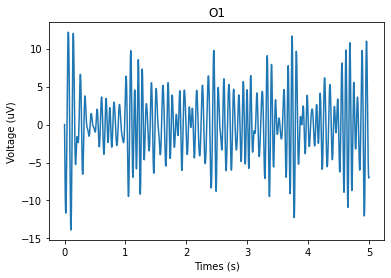

In [131]:
meta = read_metadata(ssvep_ollie[-1]) #ssvep_ollie[-1]
eeg = read_file(ssvep_ollie[0],col_names) #ssvep_ollie[0]
data = make_data(eeg, meta)
filt = get_filt_data(data, 14.800000000000006, 250, 8,20) #14.800000000000006
plot_channel(filt, 'O1', 250, 0, 5)

In [125]:
'''
meta = read_metadata(ssvep_files[4]) #ssvep_ollie[-1]
eeg = read_file(ssvep_files[3],col_names) #ssvep_ollie[0]
data = make_data(eeg, meta)
filt = get_filt_data(data, 15.6, 250, 6,20, 60) #14.800000000000006
plot_channel(filt, 'O2', 250, 0, 5)
'''

"\nmeta = read_metadata(ssvep_files[4]) #ssvep_ollie[-1]\neeg = read_file(ssvep_files[3],col_names) #ssvep_ollie[0]\ndata = make_data(eeg, meta)\nfilt = get_filt_data(data, 15.6, 250, 6,20, 60) #14.800000000000006\nplot_channel(filt, 'O2', 250, 0, 5)\n"

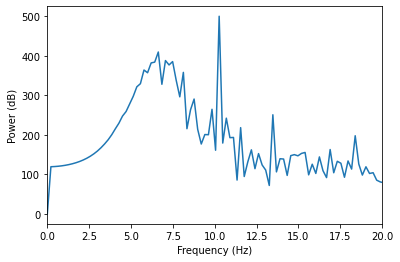

In [123]:
power = power_spectrum(filt, 250)
plot_power(power,'O1',20)

(0.0, 20.0)

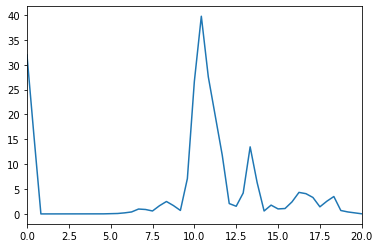

In [124]:
O1 = list(filt['O1'])
#f, Pxx = signal.periodogram(O1,fs=250)
f, Pxx = signal.welch(O1,fs=250,nperseg=600)
plt.plot(f,Pxx)
plt.xlim(0,20)

In [14]:
from scipy.fftpack import fft

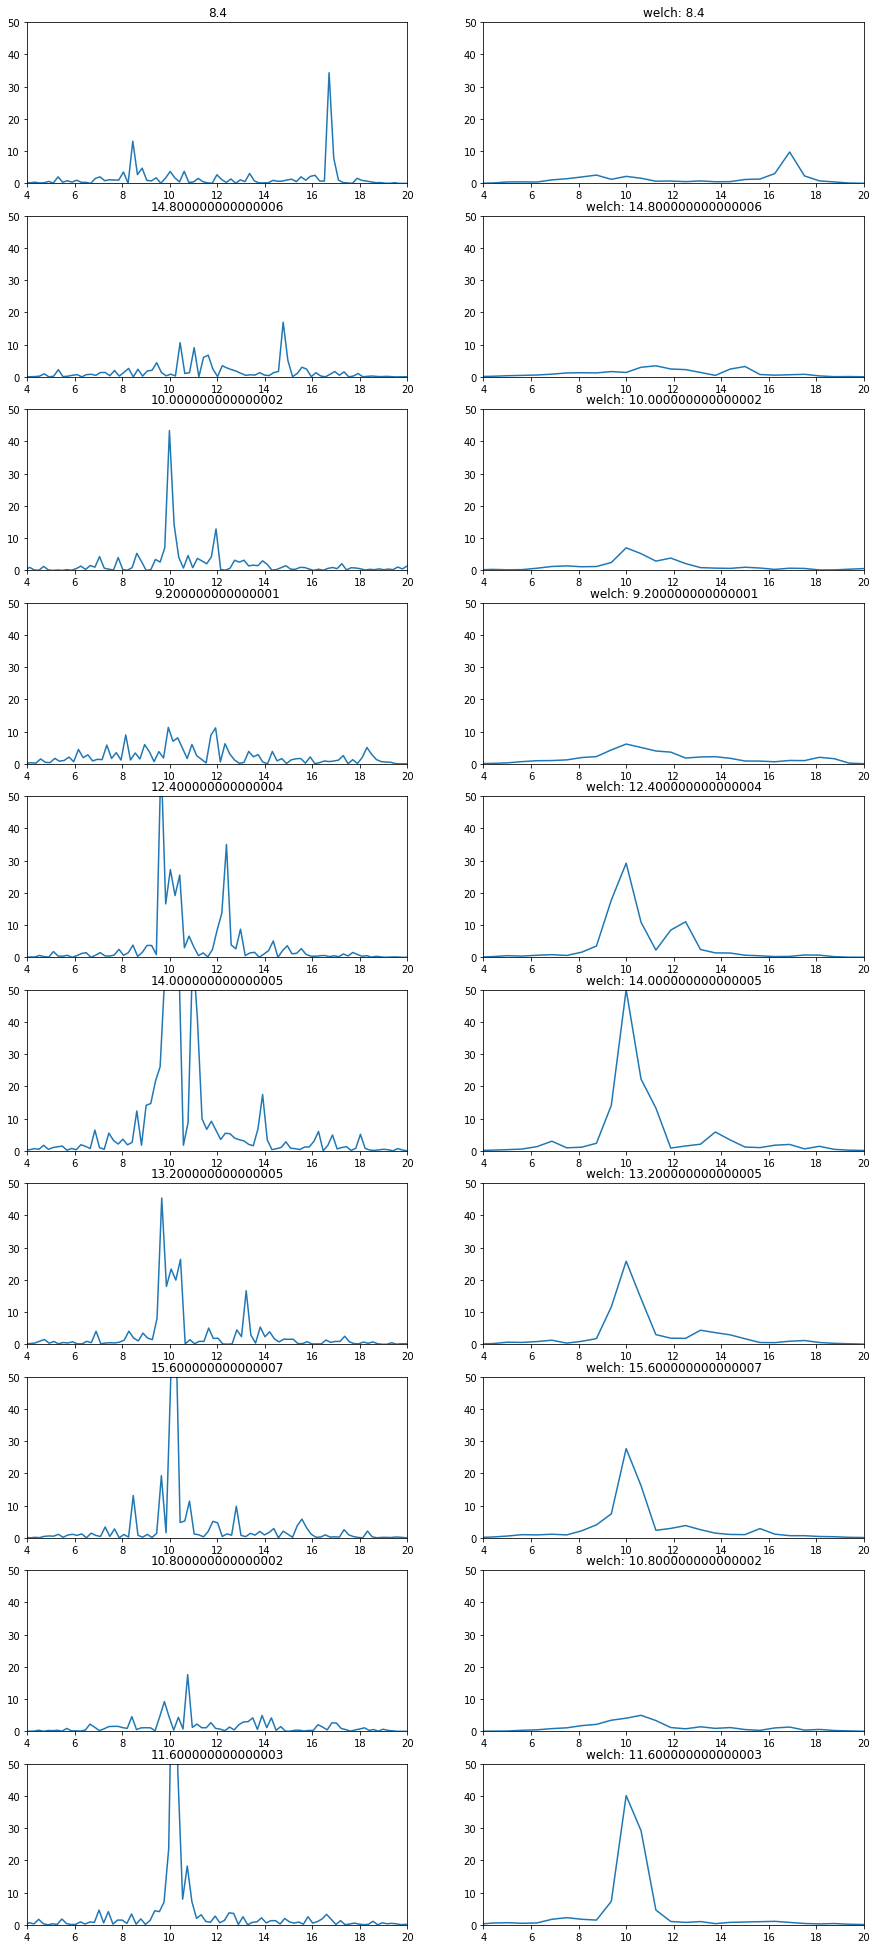

In [134]:
#meta = read_metadata(ssvep_ollie[-1])
#eeg = read_file(ssvep_ollie[0],col_names)
data = make_data(eeg, meta)
keys = [float(el) for el in list(meta.keys())][1:]
rows = len(keys)
cols = 2
fig = plt.figure(figsize=(15,35))
for c,i in enumerate(keys): 
    filt = get_filt_data(data, i, 250, 4, 20)
    #plot_channel(filt, 'O1', 250, 0, 5)
    O1 = list(filt['O1'])
    fig.add_subplot(rows,cols,2*c+1)
    f, Pxx = signal.periodogram(O1,fs=250)
    plt.plot(f,Pxx)
    plt.xlim(4,20)
    plt.ylim(0,50)
    plt.title(str(i))
    #plt.figure()
    #
    fig.add_subplot(rows,cols,2*c+2)
    f, Pxx = signal.welch(O1,fs=250,nperseg=400)
    plt.plot(f,Pxx)
    plt.xlim(4,20)
    plt.ylim(0,50)
    plt.title("welch: "+str(i))
    #plt.figure()

In [151]:
meta

{'0.000': [7512.0204655, 7514.9566909],
 '8.4': [7514.9606908999995, 7520.0458217],
 '14.800000000000006': [7523.0064935, 7528.0757471],
 '10.000000000000002': [7531.0021437, 7536.1094854],
 '9.200000000000001': [7539.1134360999995, 7544.1410694999995],
 '12.400000000000004': [7547.081674799999, 7552.1706389],
 '14.000000000000005': [7555.0906565, 7560.1974817],
 '13.200000000000005': [7563.1620904, 7568.2223774],
 '15.600000000000007': [7571.1928949, 7576.2570878999995],
 '10.800000000000002': [7579.187352, 7584.2936466],
 '11.600000000000003': [7587.200600499999, 7592.3165725]}

In [87]:
def calc_featvec(ps, df, freqs, band_width=0.4, num_harmonics=1):
    featvec = [0]*len(freqs)
    for i,f in enumerate(freqs):
        for h in np.arange(num_harmonics)+1:
            f_low = f*h - band_width
            f_high = f*h + band_width
            f_low_idx = int(f_low / df)
            f_high_idx = int(f_high / df)
            f_band = ps[f_low_idx: f_high_idx]
            featvec[i] += np.mean(f_band)
    return featvec

In [88]:
def pick_freq(featvec, freqs):
    max_ind = np.argmax(featvec)
    return freqs[max_ind]

In [188]:
meta = read_metadata(ssvep_ollie[-1])
eeg = read_file(ssvep_ollie[0],col_names)
data = make_data(eeg, meta)
filt = get_filt_data(data, 8.4)
O1 = list(filt['O1'])
f, Pxx = signal.periodogram(O1,fs=250)
#f, Pxx = signal.welch(O1,fs=250,nperseg=600)

(0.0, 20.0)

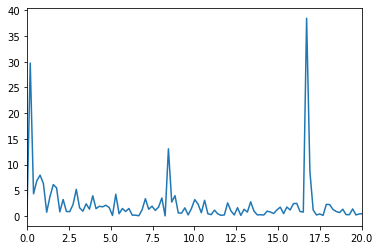

In [189]:
plt.plot(f,Pxx)
plt.xlim(0,20)

In [20]:
df = f[1]-f[0]
freqs = np.arange(8.4,16,0.8)
freqs

array([ 8.4,  9.2, 10. , 10.8, 11.6, 12.4, 13.2, 14. , 14.8, 15.6])

In [193]:
fv = calc_featvec(Pxx,df,freqs)
freq = pick_freq(fv,freqs)
fv, freq

([4.565250463833729,
  1.9388247673632417,
  1.598353373163436,
  1.5932404784292746,
  0.41538267485231095,
  1.3285052256395062,
  1.2251458796992503,
  0.3881033889601979,
  0.8360231981912989,
  1.259226321608865],
 8.4)

In [175]:
list(meta.keys())[1:]

['8.4',
 '14.800000000000006',
 '10.000000000000002',
 '9.200000000000001',
 '12.400000000000004',
 '14.000000000000005',
 '13.200000000000005',
 '15.600000000000007',
 '10.800000000000002',
 '11.600000000000003']

In [23]:
def z_score_feats(fv_list):
    """
    Compute z-scores of elements in each column of a numpy array
    
    Parameters:
    arr (numpy array): A 2D numpy array of size N, k
    
    Returns:
    A list of length k, where each component is the z-scored value across the N trials
    """
    fv_list = np.array(fv_list)
    means = np.mean(fv_list, axis=0)  # Compute the means across the rows
    stds = np.std(fv_list, axis=0)    # Compute the standard deviations across the rows
    return [(fv_list[:, i] - means[i]) / stds[i] for i in range(fv_list.shape[1])]

In [18]:
from classify import *

In [139]:
featvec_list = []
freq_list = list(meta.keys())[1:]
for freq_key in freq_list:
    filt = get_filt_data(data, float(freq_key),250,8,32)
    O1 = list(filt['O1'])
    f, Pxx = signal.periodogram(O1,fs=250)
    #f, Pxx = signal.welch(O1,fs=250,nperseg=700)
    df = f[1]-f[0]
    fv = calc_featvec(Pxx,df,freqs,band_width=0.4,num_harmonics=2)
    featvec_list.append(fv)
    freq = pick_freq(fv,freqs)
    print("Actual: {:.2f}, Predicted: {:.2f}".format(float(freq_key),float(freq)))

Actual: 8.40, Predicted: 8.40
Actual: 14.80, Predicted: 14.80
Actual: 10.00, Predicted: 10.00
Actual: 9.20, Predicted: 9.20
Actual: 12.40, Predicted: 12.40
Actual: 14.00, Predicted: 10.00
Actual: 13.20, Predicted: 10.00
Actual: 15.60, Predicted: 10.80
Actual: 10.80, Predicted: 10.80
Actual: 11.60, Predicted: 10.00


In [96]:
z_feats = z_score_feats(featvec_list)

In [97]:
for i,z in enumerate(z_feats):
    freq = pick_freq(z,freqs)
    print("Actual: {}, Predicted: {}".format(freq_list[i],freq))

Actual: 8.4, Predicted: 8.4
Actual: 14.800000000000006, Predicted: 10.800000000000002
Actual: 10.000000000000002, Predicted: 12.400000000000004
Actual: 9.200000000000001, Predicted: 12.400000000000004
Actual: 12.400000000000004, Predicted: 12.400000000000004
Actual: 14.000000000000005, Predicted: 11.600000000000003
Actual: 13.200000000000005, Predicted: 13.200000000000005
Actual: 15.600000000000007, Predicted: 12.400000000000004
Actual: 10.800000000000002, Predicted: 9.200000000000001
Actual: 11.600000000000003, Predicted: 14.000000000000005


In [33]:
freqs

array([ 8.4,  9.2, 10. , 10.8, 11.6, 12.4, 13.2, 14. , 14.8, 15.6])

In [32]:
z_feats

[array([ 2.89852597, -0.68818989, -0.73201305, -0.26467859, -0.3507134 ,
         0.237148  , -0.44203341, -0.22606979, -0.21705962, -0.21491623]),
 array([-0.36456943, -0.58232324, -0.53537075,  0.9515948 , -0.11255734,
         2.68353884, -0.32441583, -0.67391841, -0.61976435, -0.42221429]),
 array([-1.1455179 , -1.11945423,  0.20714011, -0.88984617,  0.49196167,
         2.08151151,  0.37972573, -0.03838979, -0.95283211,  0.98570119]),
 array([-1.085213  , -0.90854508, -0.96060488, -0.72952093,  0.1174911 ,
         2.12851389, -0.01802558,  1.05297853, -0.43385473,  0.83678067]),
 array([-0.76522223,  0.34428054, -0.13190362, -0.16768105, -0.529482  ,
         2.86539897, -0.41411691, -0.61315586, -0.43394048, -0.15417737]),
 array([-0.61267464, -0.44621158, -0.20685714,  0.37535199,  2.80496288,
         0.25914249, -0.6465888 , -0.37139332, -0.78158914, -0.37414275]),
 array([-0.90889289, -1.07487793, -0.1552725 , -0.73509047,  0.24823178,
         0.37676961,  2.68058257, -0.10

In [119]:
[round(float(el),1) for el in list(meta.keys())][1:]

[8.4, 14.8, 10.0, 9.2, 12.4, 14.0, 13.2, 15.6, 10.8, 11.6]

.... frequency: 8.4
.... frequency: 14.800000000000006
.... frequency: 10.000000000000002
.... frequency: 9.200000000000001
.... frequency: 12.400000000000004
.... frequency: 14.000000000000005
.... frequency: 13.200000000000005
.... frequency: 15.600000000000007
.... frequency: 10.800000000000002
.... frequency: 11.600000000000003


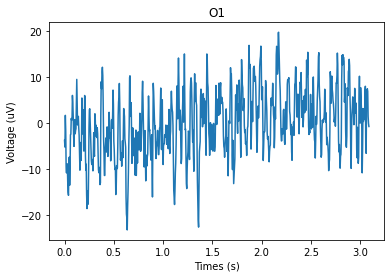

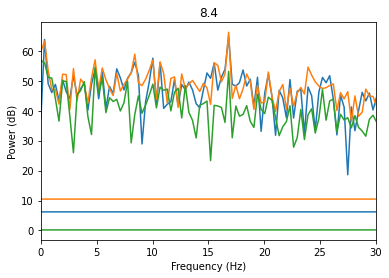

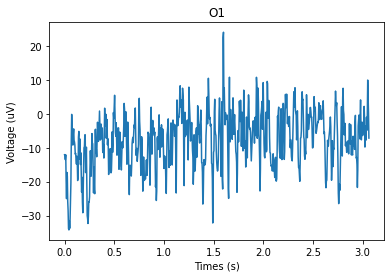

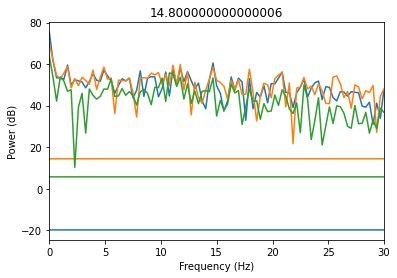

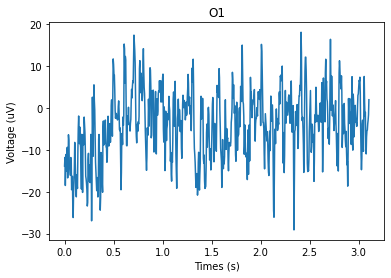

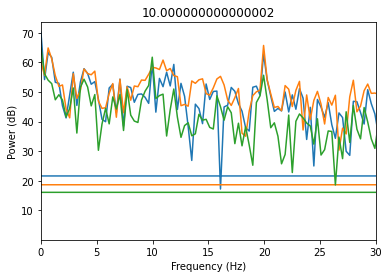

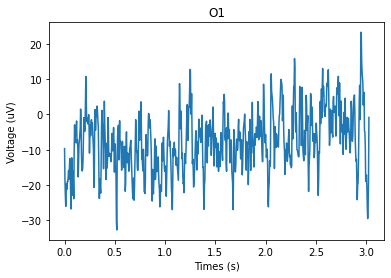

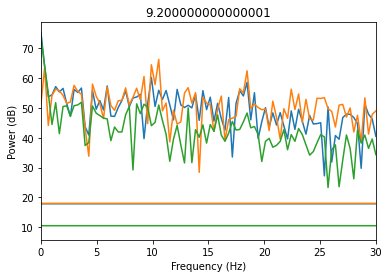

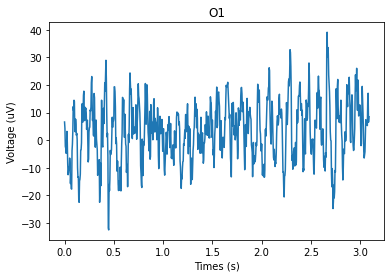

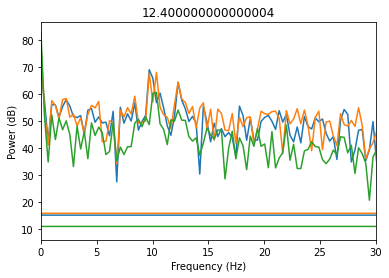

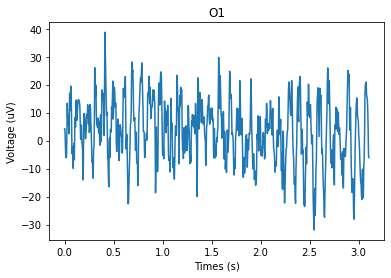

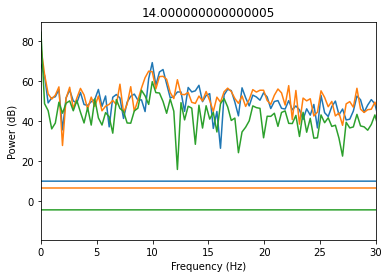

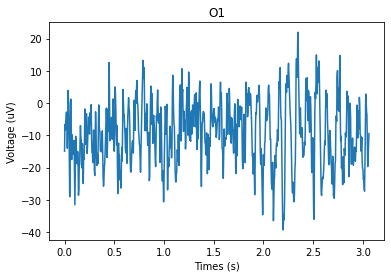

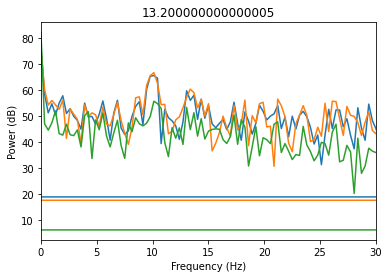

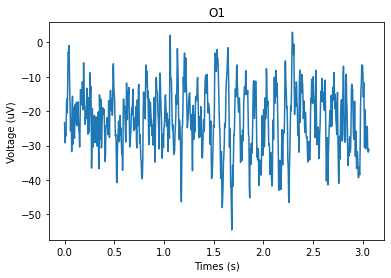

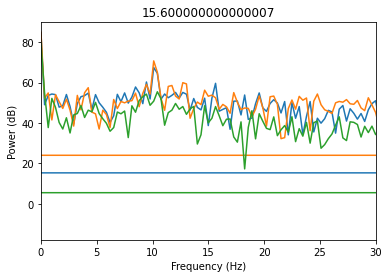

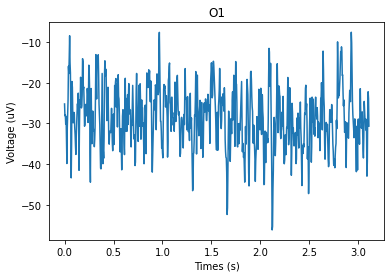

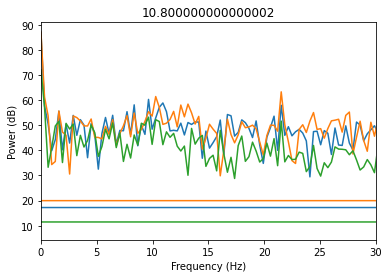

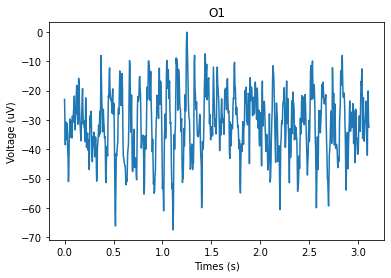

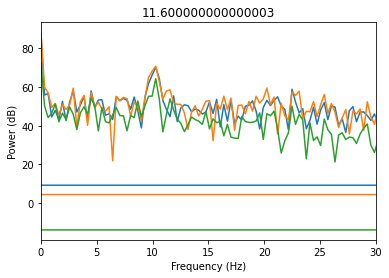

In [127]:
meta = read_metadata(ssvep_ollie[-1])
eeg = read_file(ssvep_ollie[0],col_names)
data = make_data(eeg, meta)
keys = [float(el) for el in list(meta.keys())][1:]
for i in keys: 
    filt = get_filt_data(data, i)
    plt.figure()
    print(".... frequency: " + str(i))
    plot_channel(filt, 'O1', 250, 0, 5)
    freqs, ps = power_spectrum(filt, 250)
    plt.figure()
    plot_power(freqs, ps, 'O1',250,30)
    plot_power(freqs, ps, 'O2',250,30)
    plot_power(freqs, ps, 'Pz',250,30)
    plt.title(str(i))

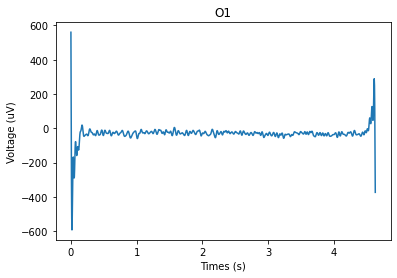

In [9]:
# 15.6, 14.8, 10.8, 9.2
md_dict = read_metadata(ssvep_files[4])
eeg_data = read_file(ssvep_files[3],col_names)
data_dict = make_data(eeg_data, md_dict)
filt = get_filt_data(data_dict, 10.0)
plot_channel(filt, channel='O1', Fs=250, start=0, end=5)

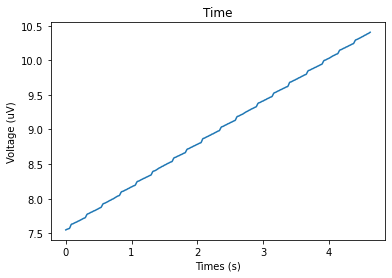

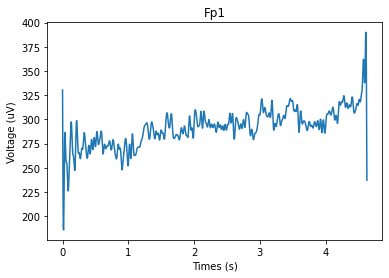

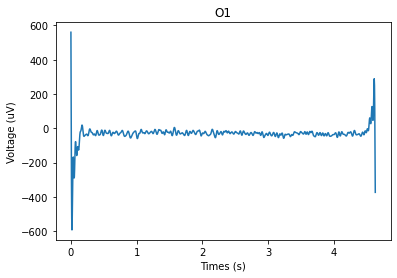

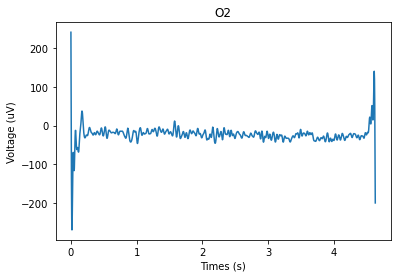

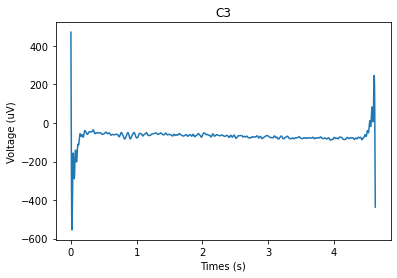

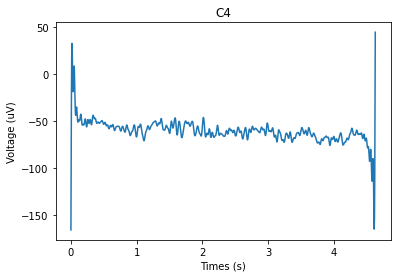

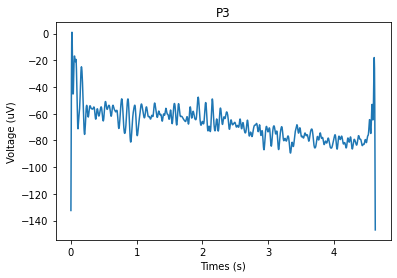

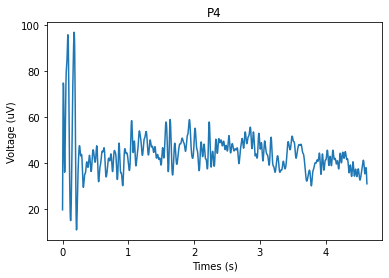

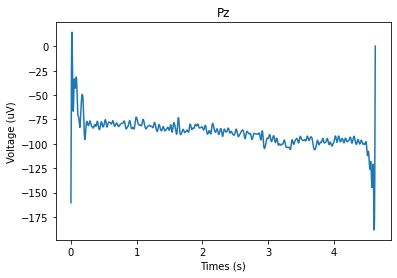

In [15]:
plot_ssvep(filt)

In [16]:
freqs, ps = power_spectrum(filt, 250)

(0.0, 15.0)

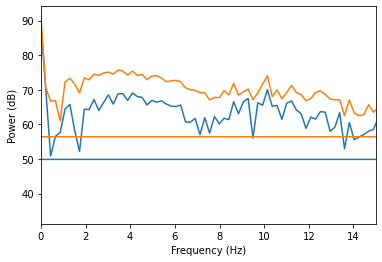

In [19]:
plot_power(freqs, ps, 'O2', 250, 100)
plot_power(freqs, ps, 'O1', 250, 100)
#plot_power(freqs, ps, 'Pz', 250, 100)
plt.xlim(0,15)

In [132]:
l1 = [5,20,3,12]
sorted(l1)

[3, 5, 12, 20]